In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc,precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv('data_encoded/encoded_heart_attack_risk_dataset.csv')
data.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Sex_Male,Diet_Healthy,Diet_Unhealthy
0,67,208,72,0,0,1,0,0,4.168189,0,...,31.251233,286,0,6,0,158,88,1,0,0
1,21,389,98,1,1,1,1,1,1.813242,1,...,27.194973,235,1,7,0,165,93,1,0,1
2,21,324,72,1,0,0,0,0,2.078353,1,...,28.176571,587,4,4,0,174,99,0,1,0
3,84,383,73,1,1,1,0,1,9.828130,1,...,36.464704,378,3,4,0,163,100,1,0,0
4,66,318,93,1,1,1,1,0,5.804299,1,...,21.809144,231,1,5,0,91,88,1,0,1


### Shuffle the data

In [4]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head(5)

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Sex_Male,Diet_Healthy,Diet_Unhealthy
0,65,340,75,0,0,1,1,1,9.870784,1,...,35.561283,315,0,4,0,124,68,1,1,0
1,77,361,46,1,0,1,0,0,2.763339,0,...,26.638707,471,3,6,1,177,104,1,1,0
2,70,341,73,1,1,1,1,1,16.325463,1,...,23.927789,104,1,8,1,156,84,1,1,0
3,47,392,72,0,1,1,1,0,5.161941,0,...,29.480917,201,6,9,1,155,75,1,0,0
4,63,173,98,0,0,1,0,1,3.681472,0,...,21.110044,638,2,7,0,103,109,1,0,1


### Split the Data

In [243]:
X = data.drop('Heart Attack Risk', axis=1)
y = data['Heart Attack Risk']

# use SMOTE to balance imbalanced dataset
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# slip data into 80% for train and 20% for test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [244]:
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 8998
Test size: 2250


In [245]:
X.loc[X.duplicated()]

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic Pressure,Diastolic Pressure,Sex_Male,Diet_Healthy,Diet_Unhealthy


### Scale the features

In [246]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Hyperparameter tuning using GridSearchCV

In [155]:
from sklearn.model_selection import GridSearchCV

param_grid = {
        'C': [ 1, 10, 100],
        'gamma': ['scale', 0.01, 0.1, 0.5, 1],
        'kernel': ['rbf']
    }

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


### Train the SVM Model

In [247]:
svm_model = SVC(kernel='rbf', C=10, gamma=0.1, probability=True)
svm_model.fit(X_train, y_train)

SVC(C=10, gamma=0.1, probability=True)

In [248]:
# Make Predictions
y_pred = svm_model.predict(X_test)

### Evaluate the Model

In [249]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6506666666666666


In [250]:
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Confusion Matrix: [[730 395]
 [391 734]]


In [251]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.65      0.65      0.65      1125
           1       0.65      0.65      0.65      1125

    accuracy                           0.65      2250
   macro avg       0.65      0.65      0.65      2250
weighted avg       0.65      0.65      0.65      2250



### Confusion Matrix and Model Metrics Plot

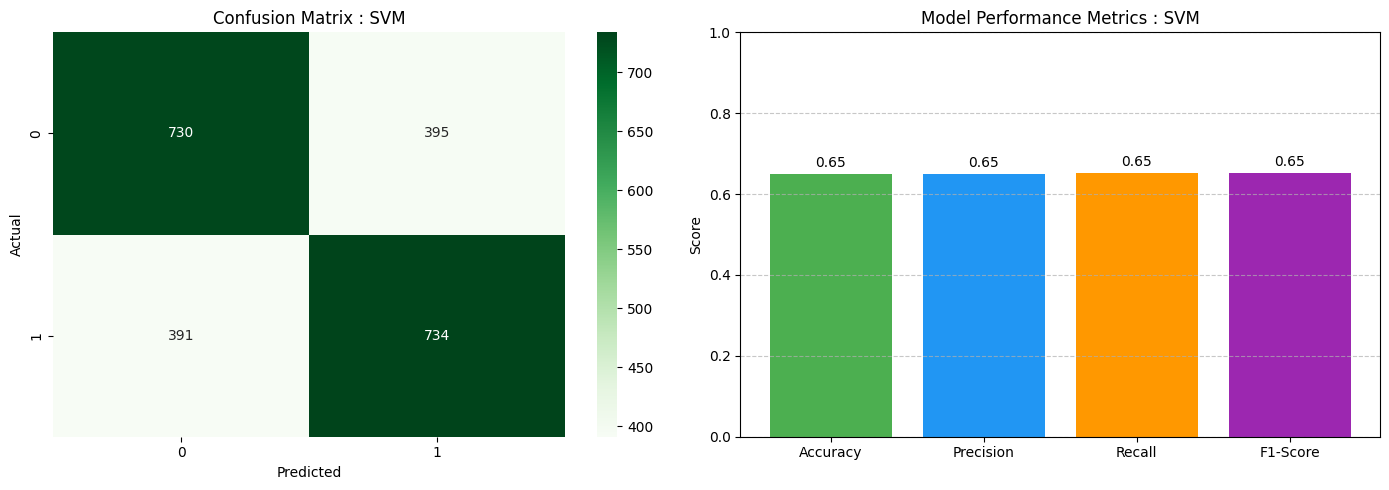

In [252]:
cm = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1 = report['1']['f1-score']
accuracy = accuracy_score(y_test, y_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=[0, 1], yticklabels=[0, 1], ax=axes[0])
axes[0].set_title("Confusion Matrix : SVM")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

bars = axes[1].bar(metrics, values, color=['#4caf50', '#2196f3', '#ff9800', '#9c27b0'])

for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

axes[1].set_ylim(0, 1)
axes[1].set_title('Model Performance Metrics : SVM')
axes[1].set_ylabel('Score')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### ROC Curve and Precision-Recall Curve

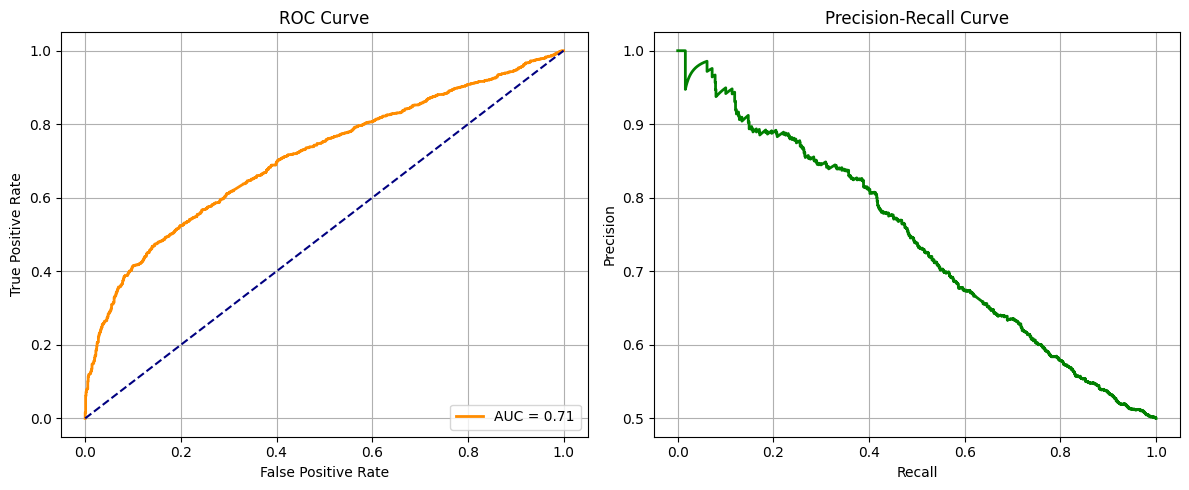

In [253]:
y_proba = svm_model.predict_proba(X_test)[:, 1]
y_pred = svm_model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
axes[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[0].set_title('ROC Curve')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc="lower right")
axes[0].grid(True)

axes[1].plot(recall, precision, color='green', lw=2)
axes[1].set_title('Precision-Recall Curve')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].grid(True)

plt.tight_layout()
plt.show()